In [9]:
%matplotlib notebook

In [1]:
pwd

'D:\\Dropbox\\Projects\\20190704_recipes\\recipes.raw\\programming\\regression-censored-gaussian-data'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [11]:
df = pd.read_csv("data.csv",header=0)
df.head()

,variable1,variable2,Unnamed: 2
0,0.87479,1.46020,NaN
1,0.12309,0.19028,NaN
2,3.32940,6.21360,NaN
3,0.62906,1.66630,NaN
4,0.38734,0.52181,NaN


<IPython.core.display.Javascript object>


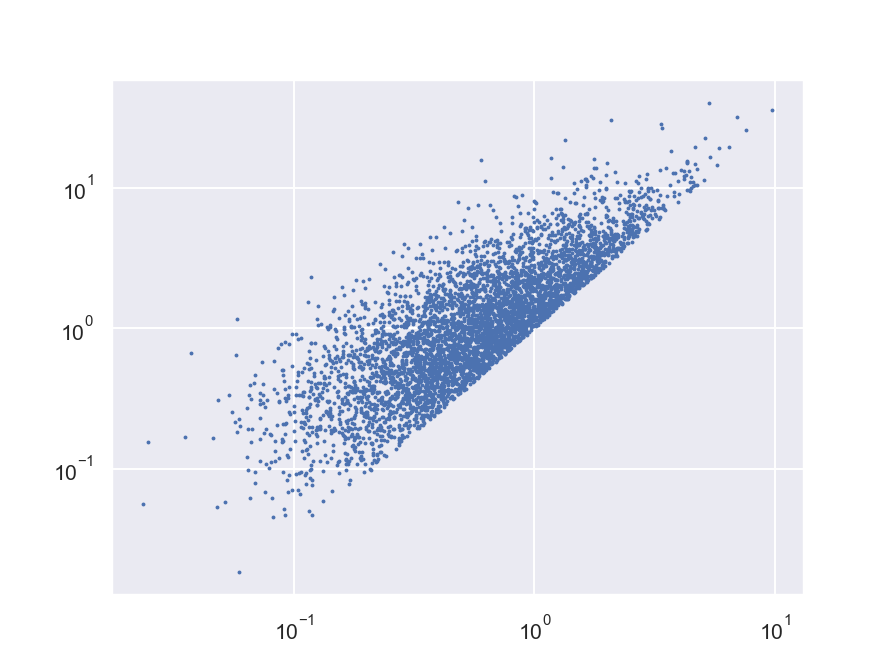

In [12]:
fig = plt.figure()
ax = fig.gca()
ax.plot ( df["variable1"]
        , df["variable2"]
        , "."
        , markersize = 2
        )
ax.set_xscale("log")
ax.set_yscale("log")

In [ ]:
class CensoredBivariateNormal():

    def __init__(self, df):
        self.df = df  # data
        self.NDIM = 2 # number of dimensions of the data
        self.NPAR = 7 # number of parameters of the model
        self.covMat = np.zeros((self.NDIM,self.NDIM))
        self.invCovMat = np.zeros((self.NDIM,self.NDIM))
        # mean1, mean2, variance1, variance2, rho, of the bivariate distribution 
        # intercept, slope of the detection threshold
        self.param = np.zeros(self.npar)

    def getLogProb(self, point):

        # form the covariance matrix of the bivariate Normal distribution
        self.covMat[0,0] = self.param[2] # variance1
        self.covMat[1,1] = self.param[3] # variance2
        self.covMat[1,0] = self.param[4] # rho (correlation)
        self.covMat[0,1] = self.param[4] # rho (correlation)

        # This is the inverse of the covariance matrix of the MVN distribution.
        self.invCovMat = np.linalg.inv(self.covMat)

        # compute the coefficient of the bivariate normal distribution
        mvnCoef = self.NDIM * np.log( 1. / np.sqrt(2.*np.pi) ) + np.log( np.sqrt(np.linalg.det(self.invCovMat)) )
        normedPoint = self.param[0:2] - point # subtract meanVec from point
        return mvnCoef - 0.5 * ( np.dot(normedPoint,np.matmul(self.invCovMat,normedPoint)) )

    def getLogLike(self,param):
        self.param = param
        return np.sum(self.getLogProb(self.dates,self.anomalies))

    def getNegLogLike(self,param):
        return -self.getLogLike(param)
